# Maximum Likelihood Estimation

Maximum Likelihood estimation is a technique used to find the optimal value of the parameters which maximize the likelihood of obtaining the results. This is used in parameter estimation in many models.

The objective here is to explore the idea of MLE using simple examples.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import math

In [38]:
import warnings
warnings.filterwarnings('ignore')

**Estimating the probabiltity of getting heads by tossing a unfair coin:**

Suppose there is an unfair coin with an unknown probabiltity of getting heads. We want to estimate the probability of getting heads using mle.

One way to approach the problem is to toss the coin 10 times and estimate the number of heads.

In [39]:
p= np.random.rand()
n=10
def coin_toss(n,p):
    x =0
    for i in range(n):
        if np.random.rand()<=p:
            x= x+1
    return x

In [40]:
y = coin_toss(n,p)
print(f'The number of heads: {y}')

The number of heads: 3


The probability of y number of heads in 10 trials can be found using the binomial pmf $L = Prob(Y=y) = nC_y p^y q^{n-y}$

The value of p* which maximizes the probability of getting y number of heads is the maximum likelihood estimate of p. Estimating p* by trial and error.

In [41]:
p_star = np.linspace(0,1,201)

In [42]:
L = math.comb(n,y)*(p_star**y)*((1-p_star)**(n-y))

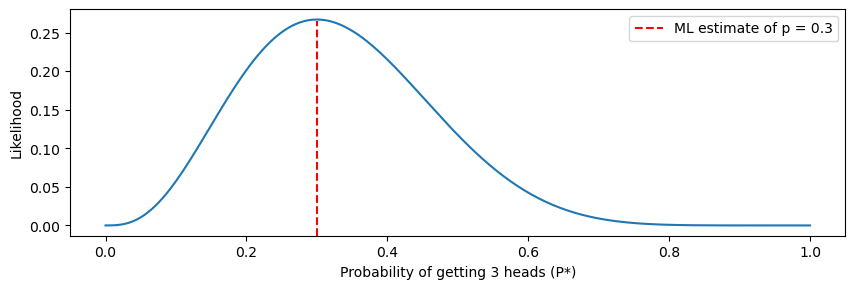

In [43]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(p_star,L)
plt.xlabel(f'Probability of getting {y} heads (P*)')
plt.ylabel('Likelihood')
plt.axvline(x = p_star[np.argmax(L)],ymax=0.95,color='red',ls='--',
            label = f'ML estimate of p = {p_star[np.argmax(L)]}')
plt.legend()

The ML estimate is based on one realization which may not be accurate. We need to repeat the experiment multiple times and the estimate the value of p based on the joint pmf. Since each trial is independent, the joint pmf is the product of individual pmfs. When solving analytically, it is easier to solve the maximum of log of the likelihood function because taking log changes products to sums. 

In [44]:
Y = [coin_toss(n,p) for x in range(1000)]

In [45]:
def log_L_binom(Y,p_star):
    return np.sum([np.log(math.comb(n,y)*(p_star**y)*((1-p_star)**(n-y))) for y in Y])

In [46]:
log_L =[log_L_binom(Y,i) for i in p_star]

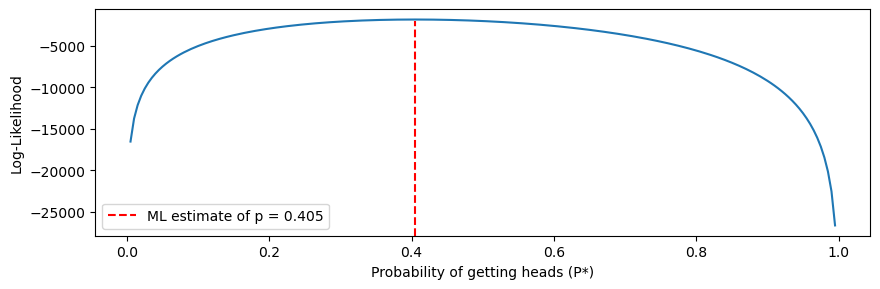

In [47]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(p_star,log_L)
plt.xlabel('Probability of getting heads (P*)')
plt.ylabel('Log-Likelihood')
plt.axvline(x = p_star[np.argmax(log_L)],ymax=0.95,color='red',ls='--',
            label = f'ML estimate of p = {p_star[np.argmax(log_L)]}')
plt.legend()

Since we are using discrete p* values, the estimate may not be exact. We can use scipy.optimize to find the maximum value of the log-likelihood function which is the same as minimizing the negative of log-likelihood.

In [48]:
f = lambda p1: log_L_binom(Y,p1)*-1
p_min = opt.minimize_scalar(f,bounds=(0,1),method='bounded').x

print(f'The ML estimate of p based on 1000 realizations is {np.round(p_min,4)}')
print(f'The true value of p is {np.round(p,4)}')

The ML estimate of p based on 1000 realizations is 0.4045
The true value of p is 0.4096


We can see that the ML estimate turns out to be close to the true value. We can increase the accuracy by either increasing the size of each experiment (10 in this case) or increasing the number of realizations (1000 in this case).